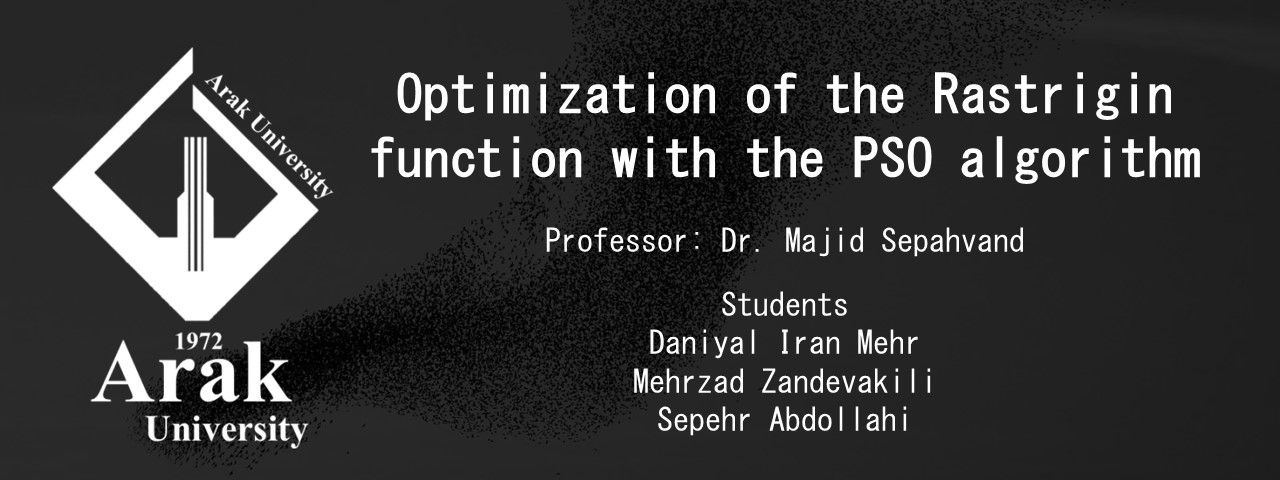

## Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D 

## Rastrigin Function

In [4]:
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x ** 2 - A * np.cos(2 * np.pi * x))

## Implementation of the PSO algorithm

In [5]:
class PSO:
    def __init__(self, num_particles, num_iterations, bounds, inertia_weight=0.5, cognitive_weight=1.5,
                 social_weight=1.5):
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.bounds = bounds
        self.inertia_weight = inertia_weight
        self.cognitive_weight = cognitive_weight
        self.social_weight = social_weight

        num_dimensions = len(bounds)

        self.positions = np.random.uniform(
            [b[0] for b in bounds],
            [b[1] for b in bounds],
            (self.num_particles, num_dimensions)
        )
        self.velocities = np.random.uniform(
            [-abs(b[1] - b[0]) for b in bounds],
            [abs(b[1] - b[0]) for b in bounds],
            (self.num_particles, num_dimensions)
        )

        self.personal_best_positions = np.copy(self.positions)
        self.personal_best_scores = np.apply_along_axis(rastrigin, 1, self.positions)
        self.global_best_position = self.personal_best_positions[np.argmin(self.personal_best_scores)]
        self.global_best_score = np.min(self.personal_best_scores)

        self.history = []
        self.best_scores_history = [] 
    def update_velocity(self, i):
        inertia = self.inertia_weight * self.velocities[i]
        cognitive = self.cognitive_weight * np.random.rand() * (self.personal_best_positions[i] - self.positions[i])
        social = self.social_weight * np.random.rand() * (self.global_best_position - self.positions[i])
        return inertia + cognitive + social

    def optimize(self):
        for iteration in range(self.num_iterations):
            iteration_positions = []
            for i in range(self.num_particles):
                self.velocities[i] = self.update_velocity(i)
                self.positions[i] += self.velocities[i]
                self.positions[i] = np.clip(self.positions[i], [b[0] for b in self.bounds], [b[1] for b in self.bounds])

                score = rastrigin(self.positions[i])

                if score < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = score
                    self.personal_best_positions[i] = np.copy(self.positions[i])

                if score < self.global_best_score:
                    self.global_best_score = score
                    self.global_best_position = np.copy(self.positions[i])

                iteration_positions.append(np.copy(self.positions[i]))

            self.history.append(iteration_positions)
            self.best_scores_history.append(self.global_best_score)  

            if self.global_best_score == 0:
                print(f"\033[36mIteration {iteration + 1}/{self.num_iterations}\033[00m, \033[96mBest Score:\033[00m \033[92m{self.global_best_score}\033[00m")
                break
            else:
                print(f"\033[36mIteration {iteration + 1}/{self.num_iterations}\033[00m, \033[96mBest Score:\033[00m \033[93m{self.global_best_score}\033[00m")


In [6]:
num_particles = 30
num_iterations = 100
bounds = [(-5.12, 5.12), (-5.12, 5.12)]

pso = PSO(num_particles, num_iterations, bounds)
pso.optimize()
print("\n-----------------------------------------")
print(f"\033[40m\nGlobal Best Position: {pso.global_best_position}")
print(f"Global Best Score: {pso.global_best_score}\033[00m")

Iteration 1/100, Best Score: 10.178057160975897
Iteration 2/100, Best Score: 10.178057160975897
Iteration 3/100, Best Score: 1.5345034547829854
Iteration 4/100, Best Score: 1.5345034547829854
Iteration 5/100, Best Score: 1.5345034547829854
Iteration 6/100, Best Score: 1.5345034547829854
Iteration 7/100, Best Score: 1.5345034547829854
Iteration 8/100, Best Score: 1.0224172327222476
Iteration 9/100, Best Score: 1.0224172327222476
Iteration 10/100, Best Score: 1.0224172327222476
Iteration 11/100, Best Score: 1.0191873787155785
Iteration 12/100, Best Score: 1.0109587354635394
Iteration 13/100, Best Score: 1.0109587354635394
Iteration 14/100, Best Score: 1.0109587354635394
Iteration 15/100, Best Score: 1.007419790633758
Iteration 16/100, Best Score: 1.007419790633758
Iteration 17/100, Best Score: 1.007419790633758
Iteration 18/100, Best Score: 1.0029232814282452
Iteration 19/100, Best Score: 1.000438533699345
Iteration 20/100, Best Score: 0.9961181193715802
Iteration 21/100, Best Score: 0.9

## 2D Plot

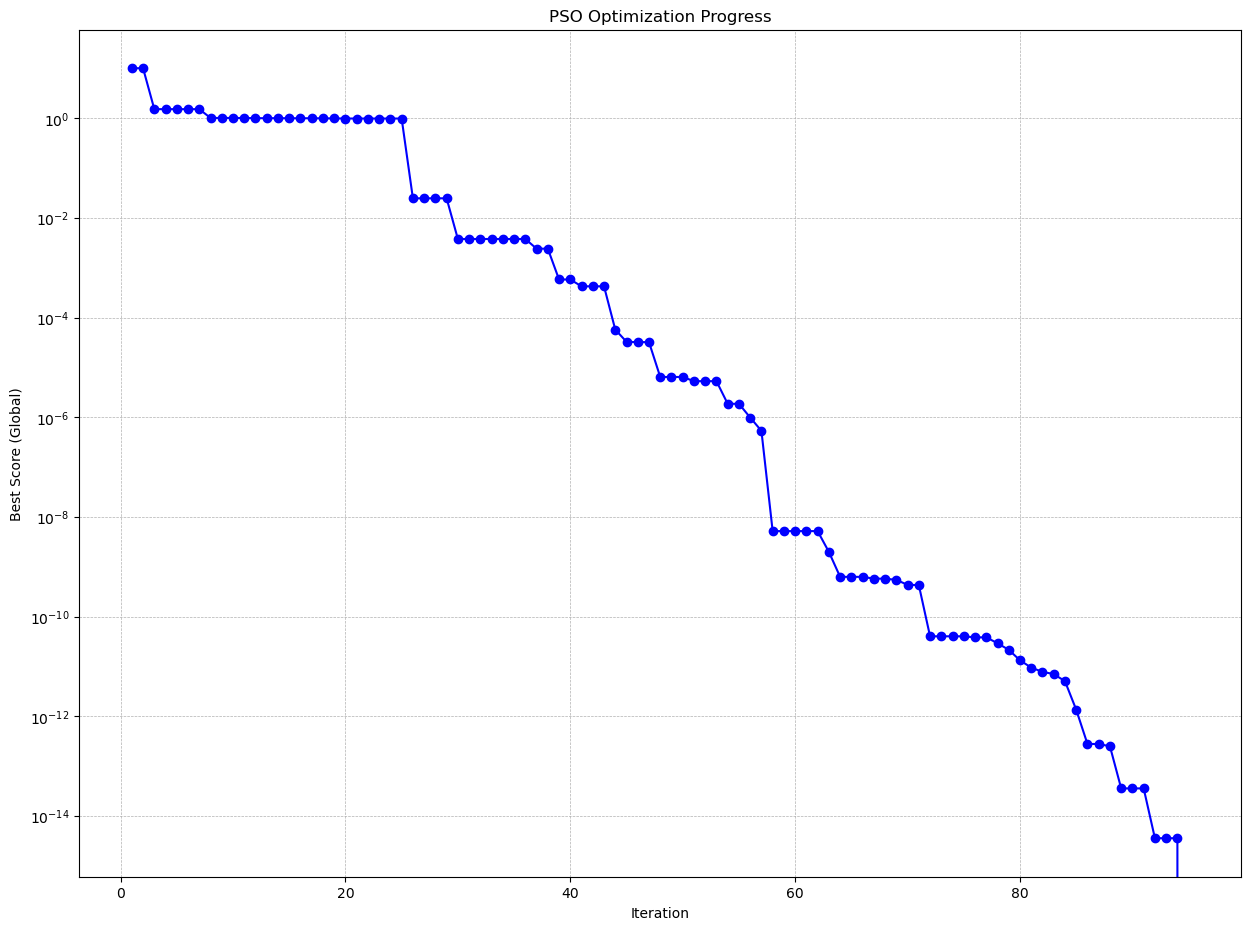

In [7]:
plt.figure(figsize=(15, 11))
plt.plot(range(1, len(pso.best_scores_history) + 1), pso.best_scores_history, marker='o', linestyle='-', color='b')
plt.title('PSO Optimization Progress')
plt.xlabel('Iteration')
plt.ylabel('Best Score (Global)')
plt.yscale('log') 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()


## Particle swarm investigation - 2D

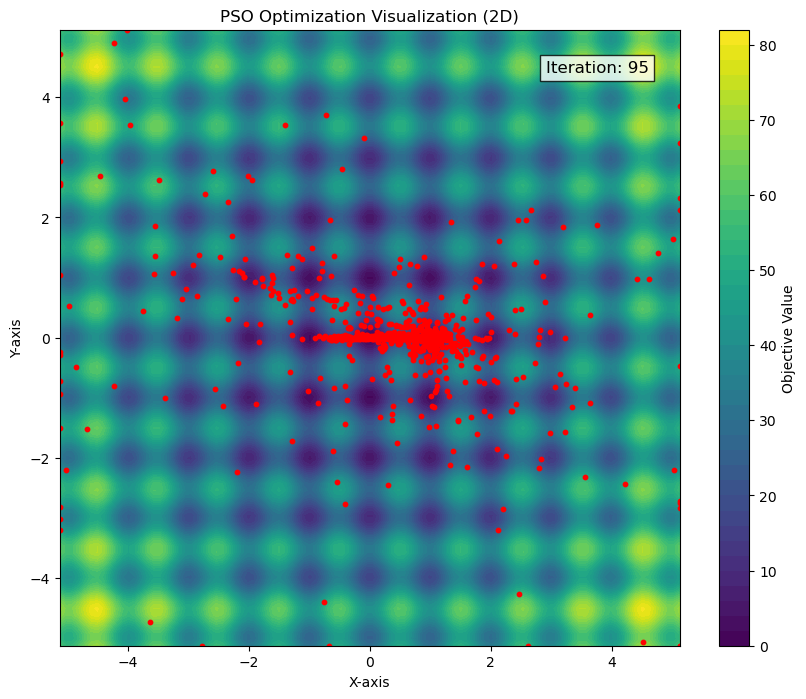

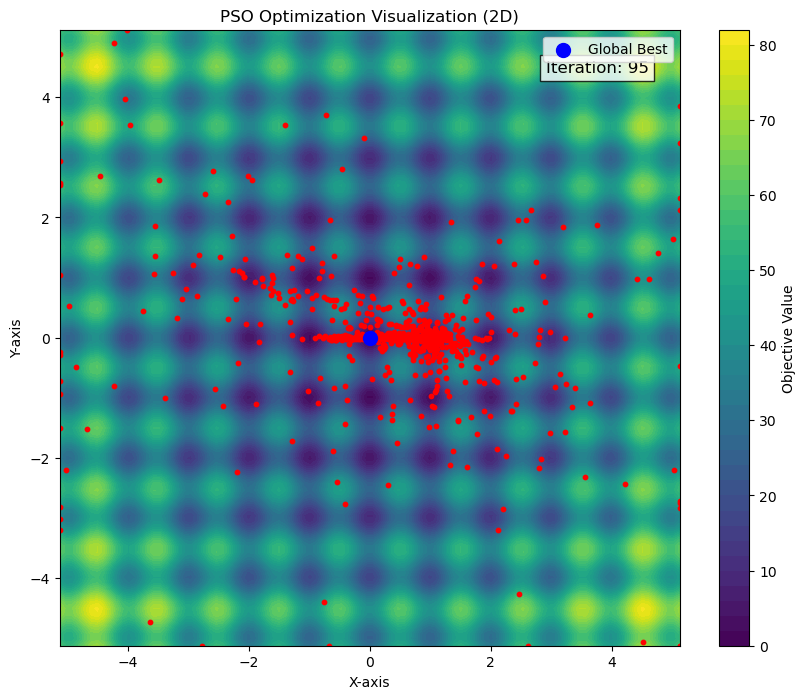

In [8]:
def plot_2d(pso, bounds):
    x = np.linspace(bounds[0][0], bounds[0][1], 100)
    y = np.linspace(bounds[1][0], bounds[1][1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([rastrigin(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    fig, ax = plt.subplots(figsize=(10, 8))
    cp = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cp, label="Objective Value")
    ax.set_title('PSO Optimization Visualization (2D)')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    iteration_text = ax.text(0.95, 0.95, '', transform=ax.transAxes, fontsize=12,
                             verticalalignment='top', horizontalalignment='right',
                             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    for i, iteration_positions in enumerate(pso.history, start=1):
        positions = np.array(iteration_positions)
        ax.scatter(positions[:, 0], positions[:, 1], color='red', s=10)

        
        iteration_text.set_text(f"Iteration: {i}")
        clear_output(wait=True)  
        display(fig) 

    # Highlight the global best position
    ax.scatter(pso.global_best_position[0], pso.global_best_position[1], color='blue', label='Global Best', s=100)
    ax.legend()
    plt.show()
plot_2d(pso, bounds)

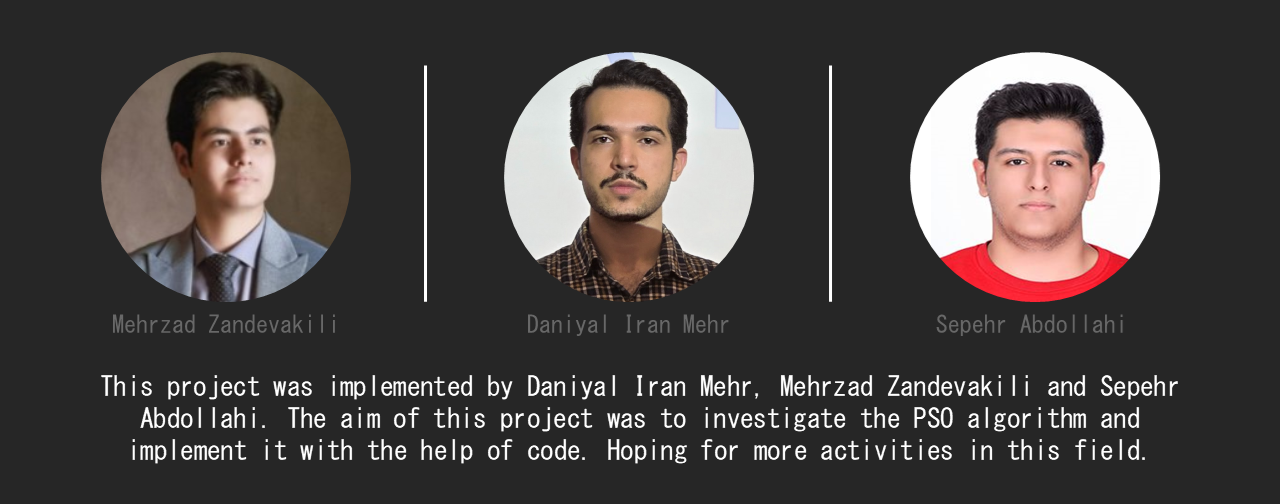